In [3]:
import numpy as np
import pandas as pd
import nltk
import tensorflow
from tensorflow.keras.utils import pad_sequences
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.models import Sequential
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.layers import LSTM,Dense , SimpleRNN , Embedding , Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import string
import joblib   #same as pickel

In [4]:
#read the data set
open('data/val.txt','r').readlines()[0]



'im feeling quite sad and sorry for myself but ill snap out of it soon;sadness\n'

In [5]:
len(open('data/train.txt','r').readlines())

16000

In [6]:
len(open('data/test.txt','r').readlines())

2000

In [7]:
len(open('data/val.txt','r').readlines())

2000

In [8]:
# reading the data from .txt file

train = open('data/train.txt','r').readlines()
test = open('data/test.txt','r').readlines()
val = open('data/val.txt','r').readlines()

In [9]:
full_data =train +test +val
len(full_data)

20000

## creating independent and dependent variable

In [10]:
open('data/val.txt','r').readlines()[0].split(';')



['im feeling quite sad and sorry for myself but ill snap out of it soon',
 'sadness\n']

In [11]:
x=[]
y=[]
for item in full_data:
    text ,label =item.split(';')
    label=label.replace('\n','')
    x.append(text)
    y.append(label)

In [12]:
x[5]

'ive been feeling a little burdened lately wasnt sure why that was'

In [13]:
y

['sadness',
 'sadness',
 'anger',
 'love',
 'anger',
 'sadness',
 'surprise',
 'fear',
 'joy',
 'love',
 'sadness',
 'joy',
 'anger',
 'sadness',
 'joy',
 'joy',
 'sadness',
 'sadness',
 'sadness',
 'fear',
 'anger',
 'fear',
 'joy',
 'joy',
 'anger',
 'sadness',
 'sadness',
 'sadness',
 'anger',
 'joy',
 'joy',
 'fear',
 'surprise',
 'anger',
 'joy',
 'joy',
 'joy',
 'joy',
 'anger',
 'joy',
 'joy',
 'joy',
 'joy',
 'joy',
 'sadness',
 'sadness',
 'joy',
 'love',
 'joy',
 'anger',
 'joy',
 'sadness',
 'anger',
 'fear',
 'joy',
 'sadness',
 'sadness',
 'surprise',
 'joy',
 'joy',
 'joy',
 'love',
 'fear',
 'fear',
 'surprise',
 'anger',
 'anger',
 'sadness',
 'love',
 'joy',
 'sadness',
 'sadness',
 'joy',
 'sadness',
 'sadness',
 'sadness',
 'joy',
 'joy',
 'joy',
 'anger',
 'sadness',
 'anger',
 'anger',
 'anger',
 'joy',
 'joy',
 'joy',
 'joy',
 'sadness',
 'fear',
 'love',
 'anger',
 'sadness',
 'anger',
 'love',
 'sadness',
 'joy',
 'joy',
 'sadness',
 'anger',
 'love',
 'joy',
 '

In [14]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [20]:
#nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ishuk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ishuk\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [29]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ishuk\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

In [23]:
import nltk
print(nltk.data.path)


['C:\\Users\\ishuk/nltk_data', 'c:\\Users\\ishuk\\AppData\\Local\\Programs\\Python\\Python39\\nltk_data', 'c:\\Users\\ishuk\\AppData\\Local\\Programs\\Python\\Python39\\share\\nltk_data', 'c:\\Users\\ishuk\\AppData\\Local\\Programs\\Python\\Python39\\lib\\nltk_data', 'C:\\Users\\ishuk\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [24]:
import nltk

# Specify the data directory path (replace with your actual path)
nltk.data.path.append('C:\\Users\\ishuk/nltk_data')



In [25]:
# import nltk
# print(nltk.data.find('corpora/words'))

LookupError: 
**********************************************************************
  Resource [93mwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('words')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/words[0m

  Searched in:
    - 'C:\\Users\\ishuk/nltk_data'
    - 'c:\\Users\\ishuk\\AppData\\Local\\Programs\\Python\\Python39\\nltk_data'
    - 'c:\\Users\\ishuk\\AppData\\Local\\Programs\\Python\\Python39\\share\\nltk_data'
    - 'c:\\Users\\ishuk\\AppData\\Local\\Programs\\Python\\Python39\\lib\\nltk_data'
    - 'C:\\Users\\ishuk\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - 'C:\\Users\\ishuk/nltk_data'
**********************************************************************


In [30]:
# first we will do lowerise all the text
# second we will perform word tokenization
# third we will remove stopwords
# fourth we will perform stemming or lemmataization on each word
# then make a clean text 
stem = PorterStemmer()

def text_cleaning(sentences):
    clean_text = []
    for sent in sentences:
        lower_sent = sent.lower()   # first lowerising the sentence
        word_tokenize = nltk.word_tokenize(sent)   #performing word_tokenization
        removed_stop_words = [word for word in word_tokenize if word not in stopwords.words('english')]  # remove stopwords
        stemmed_sent = [stem.stem(word) for word in removed_stop_words]  # apply stemming
        cleaned = " ".join(stemmed_sent)  # joining our final words
        clean_text.append(cleaned)      # appending cleaned text in a separate list
    return clean_text

In [31]:
cleaned_data = text_cleaning(x)

In [32]:
cleaned_data[5]
# after cleaning

'ive feel littl burden late wasnt sure'

In [33]:
## creating the object Tokenizer
tokenizer = Tokenizer(oov_token='<nothing>')
# we can also pass num_word parameter

In [34]:
tokenizer.fit_on_texts(cleaned_data)
#we are fitting tokenizer on our cleaned dataset

In [35]:
#save the model
joblib.dump(tokenizer.word_index,'word_index_tokens.lb')
# to check initialize tokens for the word it return a dict, key -> word , value -> initialized token no.

['word_index_tokens.lb']

In [36]:
tokenizer.word_index


{'<nothing>': 1,
 'feel': 2,
 'like': 3,
 'im': 4,
 'get': 5,
 'time': 6,
 'know': 7,
 'realli': 8,
 'make': 9,
 'go': 10,
 'want': 11,
 'love': 12,
 'littl': 13,
 'think': 14,
 'peopl': 15,
 'day': 16,
 'thing': 17,
 'one': 18,
 'would': 19,
 'even': 20,
 'still': 21,
 'ive': 22,
 'life': 23,
 'bit': 24,
 'way': 25,
 'need': 26,
 'someth': 27,
 'much': 28,
 'dont': 29,
 'work': 30,
 'start': 31,
 'could': 32,
 'say': 33,
 'look': 34,
 'see': 35,
 'tri': 36,
 'back': 37,
 'good': 38,
 'pretti': 39,
 'come': 40,
 'right': 41,
 'alway': 42,
 'help': 43,
 'also': 44,
 'today': 45,
 'year': 46,
 'take': 47,
 'friend': 48,
 'use': 49,
 'around': 50,
 'cant': 51,
 'person': 52,
 'made': 53,
 'though': 54,
 'hate': 55,
 'well': 56,
 'got': 57,
 'happi': 58,
 'thought': 59,
 'someon': 60,
 'didnt': 61,
 'never': 62,
 'felt': 63,
 'find': 64,
 'write': 65,
 'lot': 66,
 'hope': 67,
 'quit': 68,
 'live': 69,
 'week': 70,
 'everi': 71,
 'sure': 72,
 'less': 73,
 'read': 74,
 'enough': 75,
 'give':

In [37]:
tokenizer.word_counts
# to check no. of count of words

OrderedDict([('didnt', 334),
             ('feel', 21204),
             ('humili', 69),
             ('go', 1101),
             ('hopeless', 81),
             ('damn', 54),
             ('hope', 320),
             ('around', 382),
             ('someon', 335),
             ('care', 254),
             ('awak', 22),
             ('im', 3055),
             ('grab', 22),
             ('minut', 79),
             ('post', 234),
             ('greedi', 79),
             ('wrong', 152),
             ('ever', 260),
             ('nostalg', 63),
             ('fireplac', 3),
             ('know', 1192),
             ('still', 743),
             ('properti', 5),
             ('grouchi', 35),
             ('ive', 723),
             ('littl', 932),
             ('burden', 95),
             ('late', 167),
             ('wasnt', 119),
             ('sure', 310),
             ('take', 403),
             ('milligram', 1),
             ('time', 1215),
             ('recommend', 19),
             ('amoun

In [38]:
tokenizer.document_count
# to check total no. of sentences

20000

In [39]:
sequences = tokenizer.texts_to_sequences(cleaned_data)
sequences[0:5]

# tokenize the input sentences as a sequence 

[[61, 2, 522],
 [10, 2, 419, 682, 67, 50, 60, 96, 1229],
 [4, 1230, 431, 107, 2, 432, 192],
 [92, 2, 592, 3696, 7, 21, 2844],
 [2, 918]]

In [40]:
sequences = pad_sequences(sequences,padding='post',maxlen=35)
sequences[0:3]
# to equalize the length of input sequences

array([[  61,    2,  522,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [  10,    2,  419,  682,   67,   50,   60,   96, 1229,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [   4, 1230,  431,  107,    2,  432,  192,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0]])

In [41]:
unique_labels = list(pd.Series(np.array(y)).unique())
no_of_class = len(unique_labels)

unique_labels , no_of_class
## to finding unique labels and no. of class

(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'], 6)

In [43]:
label_dict = {
    'sadness':0,
    'anger':1,
    'love':2,
    'surprise':3,
    'fear':4,
    'joy':5
}
def label_encoder(labels):
    label = []
    for lab in labels:
        label.append(label_dict[lab])
    label = np.array(label)
    return label

label = label_encoder(y)

# to perform label encoding

In [44]:
label[0:7]


array([0, 0, 1, 2, 1, 0, 3])

In [45]:
sequences.shape , label.shape

((20000, 35), (20000,))

In [46]:
x_train,x_test,y_train,y_test = train_test_split(sequences,label,test_size=0.2,random_state=42)

In [47]:
x_train.shape,    x_test.shape    ,  y_test.shape    ,  y_train.shape 

((16000, 35), (4000, 35), (4000,), (16000,))

In [48]:
# Define the model
model = Sequential([
    LSTM(units=64, input_shape=(35, 1), return_sequences=True),
    LSTM(units=64),
    Dense(units=6, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [50]:
history = model.fit(x_train,y_train,epochs=10)

Epoch 1/10


500/500 [==============================] - 14s 27ms/step - loss: 1.5707 - accuracy: 0.3456
Epoch 2/10
500/500 [==============================] - 13s 26ms/step - loss: 1.5700 - accuracy: 0.3414
Epoch 3/10
500/500 [==============================] - 14s 28ms/step - loss: 1.5676 - accuracy: 0.3468
Epoch 4/10
500/500 [==============================] - 12s 24ms/step - loss: 1.5664 - accuracy: 0.3467
Epoch 5/10
500/500 [==============================] - 12s 24ms/step - loss: 1.5650 - accuracy: 0.3499
Epoch 6/10
500/500 [==============================] - 12s 24ms/step - loss: 1.5634 - accuracy: 0.3530
Epoch 7/10
500/500 [==============================] - 12s 24ms/step - loss: 1.5676 - accuracy: 0.3479
Epoch 8/10
500/500 [==============================] - 12s 24ms/step - loss: 1.5749 - accuracy: 0.3382
Epoch 9/10
500/500 [==============================] - 13s 26ms/step - loss: 1.5724 - accuracy: 0.3420
Epoch 10/10
500/500 [==============================] - 12s 25ms/step - loss: 1.5705 - accurac

<AxesSubplot:>

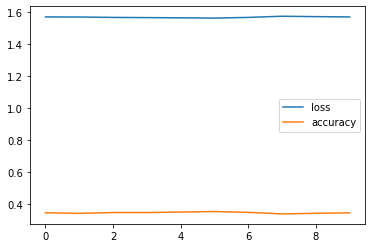

In [51]:
pd.DataFrame(model.history.history).plot()

In [52]:
prediction = model.predict(x_test)

125/125 [==============================] - 2s 12ms/step


In [53]:
predicted_class_index = np.argmax(prediction,axis=1)

In [55]:
y_test[0:10]

array([1, 5, 0, 0, 5, 0, 1, 4, 5, 5])

In [56]:
predicted_class_index[0:10]

array([5, 5, 5, 5, 5, 5, 5, 5, 0, 5], dtype=int64)

In [57]:
#user input

In [59]:
a="i felt anger when at the end of a telephone call"   # isko label encoding dana ha

prediction1 = model.predict(a)


IndexError: tuple index out of range